In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('IBMD Movie dataset.txt',delimiter = ',')

In [4]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [7]:
df.shape

(1000, 12)

In [8]:
## % of total is null
df.isnull().sum() * 100 /len(df)

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

## Drop missing values 

In [9]:
df.dropna(axis=0, inplace = True)

In [10]:
df.dropna(axis=1, inplace = True)

In [12]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## Check for duplicates 

In [13]:
df.duplicated().sum()

0

## Display the title of movie having runtime >= 180miutes

In [14]:
df[df['Runtime (Minutes)'] >= 180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

## in which year was there the highest average voting 

In [15]:
df.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2012    290861.483871
2006    277232.219512
2009    267180.577778
2008    266580.145833
2007    266530.704545
2010    261082.929825
2011    259254.736842
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

Text(0.5, 1.0, 'Votes By Year')

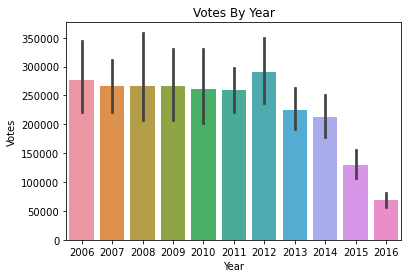

In [16]:
sns.barplot(x='Year',y='Votes',data= df)
plt.title('Votes By Year')

## In which year was te highest average revenue

In [17]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [18]:
df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

Year
2009    115.742000
2012    110.103065
2010    105.081579
2008     97.525417
2011     93.703333
2007     93.074091
2013     88.084643
2006     87.255610
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue (Millions), dtype: float64

Text(0.5, 1.0, 'Votes By Year')

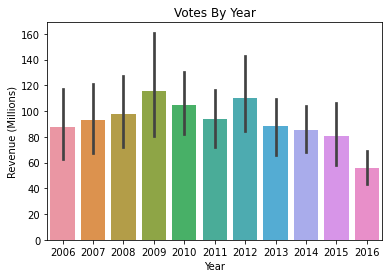

In [19]:
sns.barplot(x='Year',y='Revenue (Millions)',data= df)
plt.title('Votes By Year')

## find the average rating for each director

In [20]:
df.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Aamir Khan                          8.50
Florian Henckel von Donnersmarck    8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

## Display the top 10 lenghty films 

In [21]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [22]:
df.groupby('Title')['Runtime (Minutes)'].sum().sort_values(ascending=False).head(10)

Title
The Host                                    245
The Hateful Eight                           187
La vie d'Adèle                              180
The Wolf of Wall Street                     180
Cloud Atlas                                 172
3 Idiots                                    170
Pirates of the Caribbean: At World's End    169
The Hobbit: An Unexpected Journey           169
Interstellar                                169
The Curious Case of Benjamin Button         166
Name: Runtime (Minutes), dtype: int64

## Display Number of Movies Per Year

In [23]:
df.groupby('Year')['Title'].count()

Year
2006     41
2007     44
2008     48
2009     45
2010     57
2011     57
2012     62
2013     84
2014     93
2015    109
2016    198
Name: Title, dtype: int64

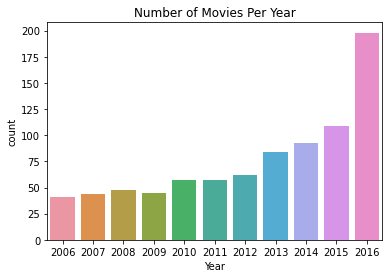

In [24]:
sns.countplot(x='Year',data= df)
plt.title('Number of Movies Per Year')
plt.show()

## Find the Most Popular Movie Title (Highest Revenue)

In [25]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [26]:
df.groupby('Title')['Revenue (Millions)'].sum().sort_values(ascending=False)

Title
Star Wars: Episode VII - The Force Awakens    936.63
Avatar                                        760.51
Jurassic World                                652.18
The Avengers                                  623.28
The Dark Knight                               533.32
                                               ...  
Wakefield                                       0.01
Into the Forest                                 0.01
Lovesong                                        0.01
Love, Rosie                                     0.01
A Kind of Murder                                0.00
Name: Revenue (Millions), Length: 837, dtype: float64

## Display Top 10 Highest Rated Movie Title and its Directors

In [27]:
top10 = df.nlargest(10,'Rating')[['Director','Rating','Title']]
top = top10.set_index('Title')
top

,Director,Rating
Title,,
The Dark Knight,Christopher Nolan,9.0
Inception,Christopher Nolan,8.8
Interstellar,Christopher Nolan,8.6
Kimi no na wa,Makoto Shinkai,8.6
The Intouchables,Olivier Nakache,8.6
The Prestige,Christopher Nolan,8.5
The Departed,Martin Scorsese,8.5
The Dark Knight Rises,Christopher Nolan,8.5
Whiplash,Damien Chazelle,8.5


<AxesSubplot:xlabel='Rating', ylabel='Title'>

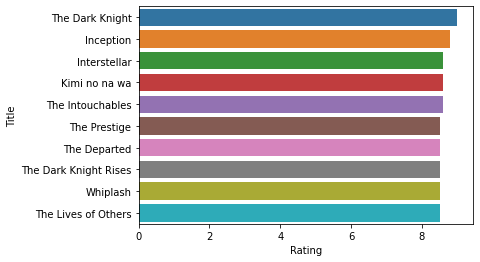

In [28]:
sns.barplot(x='Rating',y=top.index,data=top)

## Display Top 10 Highest Revenue Movie Title

In [29]:
t10 = df.groupby('Title')['Revenue (Millions)'].sum().sort_values(ascending = False).head(10)
t10=t10.to_frame()

<AxesSubplot:xlabel='Revenue (Millions)', ylabel='Title'>

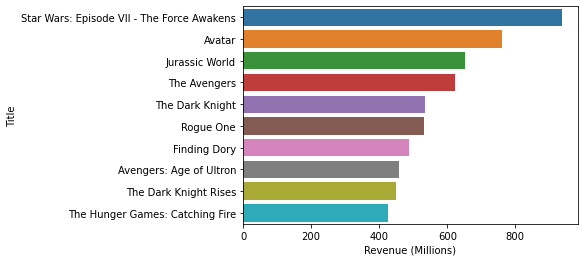

In [30]:
sns.barplot(x='Revenue (Millions)',y=t10.index,data=t10)

## Find average Movie rating per year

In [31]:
df.groupby('Year')['Rating'].mean().sort_values(ascending = False)#.head(10)

Year
2006    7.143902
2007    7.140909
2011    6.945614
2012    6.933871
2009    6.911111
2010    6.894737
2013    6.832143
2014    6.822581
2008    6.708333
2015    6.674312
2016    6.644444
Name: Rating, dtype: float64

## Does rating affect the revenue

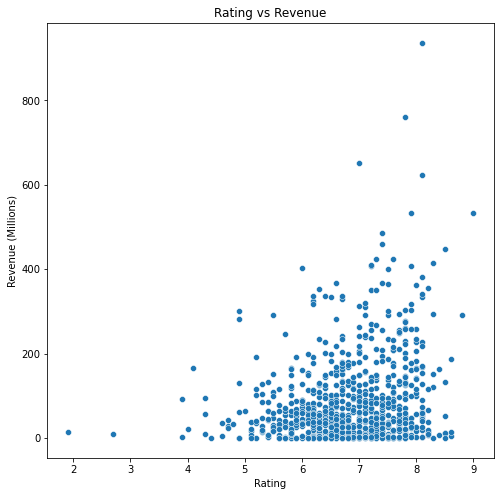

In [38]:
# to answer this question we'd use a scatter plot 
plt.figure(figsize = (8,8))
sns.scatterplot(x='Rating',y='Revenue (Millions)', data=df)
plt.title('Rating vs Revenue')
plt.show()

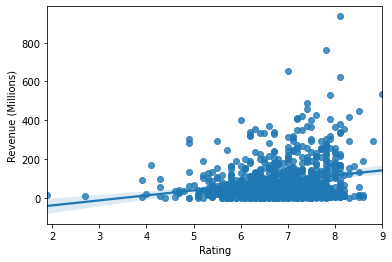

In [34]:
plt.figure(figsize = (8,8))
sns.regplot(x='Rating',y='Revenue (Millions)', data=df)
plt.title('Rating vs Revenue')
plt.show()

## Classify Movies based on Ratings into Excellent, Good, Average 

In [39]:
## we could use the map here but cause of the number of ratings and the form it appeared in 

def ratings(rate):#Rating could have been anything actualy ooo its the rating in the bracket 
#that matters and if we had made the rating in the bracket something else we must take that something else
    if rate >= 7.0:
        return 'Excellent'
    elif rate >= 6.0:
        return 'Average'
    else:
        return'Good'
# remeber to always use return here not print() cause we assigning it to a variable. Else it'd just print it once 

In [40]:
df['rating_cal3'] = df['Rating'].apply(ratings) # map() would also work cause we dealing with one column

In [42]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_cal3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Average


##  Count number of Action Movies 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    int64  
 7   Runtime (Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    int64  
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
 12  rating_cal3         838 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 131.7+ KB


In [44]:
# before performimg certin actions, endeavour to look at the datatype, certain data types dont allow certain methods
df['Genre'].dtype

dtype('O')

In [46]:
## because the Genre column ids of the obect data type, we can use str.contain to work on it 
df[df['Genre'].str.contains('Action')].head() ## # if we not sure of the form we can use case = False

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_cal3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Average
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Average
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,Excellent
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0,Excellent


## Find unique values from Genre

In [ ]:
##  if we run it like this we'd get each of the genres but not the unique vales
df['Genre'].unique()

df.groupby('Genre').sum()

In [ ]:
##  even if we run it like this we'd just still be getting the number of eacg combo but not the disticnt values 
df['Genre'].value_counts()

In [ ]:
df['Genre']

In [47]:
## ist we' split this items by comma
list1 = [] # ist we create an empty list 
for value in df['Genre']: # we call the values inside the df['Genre']
    list1.append(value.split(',')) # then we start splitting the values in df['Genre'] and appending it to the created empty list

In [50]:
list1 # this gives us the splited df[Genre]

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Horror', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi']

In [51]:
## now we want to convert a 2D dataframe to 1D
one_d = [] # ist we create an empty list 
for item in list1: # we call the values inside the created list1 above
    for item1 in item: ## then we call the items in te 2D out
        one_d.append(item1) # then we start appending it to the created empty list

In [52]:
one_d

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Horror',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Advent

In [ ]:
## after creating the one_d. There are 2 ways to now fid the unique values 

In [53]:
##(!) this is one way. turn this one_d to a dataframe
one_dd = pd.DataFrame(one_d)
list(one_dd[0].unique()) ## then use the column name to find the unique values  

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Western',
 'Crime',
 'War',
 'Musical',
 'Sport']

In [54]:
# (2) Another thing we can do is do a values count. Dataframe doesnt have the attribute . unique so we cant do 
# one_dd.unique() so rather we'd do this one_dd.value_counts()
one_dd.value_counts()

Drama        419
Action       277
Comedy       250
Adventure    244
Thriller     148
Crime        126
Romance      120
Sci-Fi       107
Fantasy       92
Horror        87
Mystery       86
Biography     67
Family        48
Animation     45
History       25
Music         15
Sport         15
War           10
Musical        5
Western        4
dtype: int64

## How Many Films of Each Genre Were Made

In [55]:
## this would have helped us answer both questions at once
one_dd.value_counts()

Drama        419
Action       277
Comedy       250
Adventure    244
Thriller     148
Crime        126
Romance      120
Sci-Fi       107
Fantasy       92
Horror        87
Mystery       86
Biography     67
Family        48
Animation     45
History       25
Music         15
Sport         15
War           10
Musical        5
Western        4
dtype: int64

In [58]:
## correlation testing
matrix = df.corr(method = 'pearson')

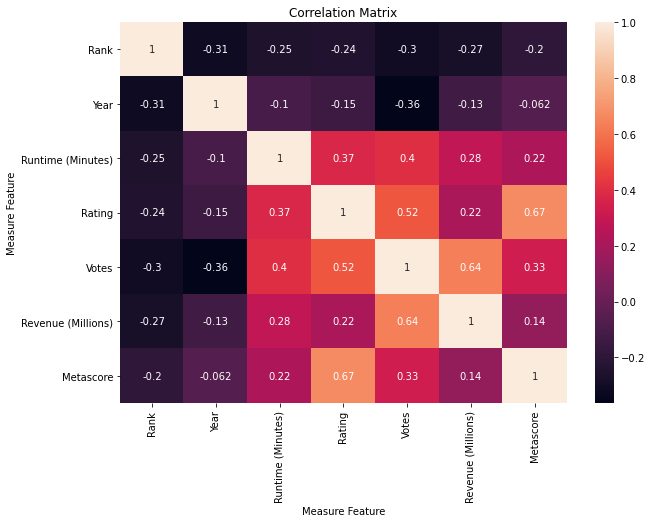

In [66]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Measure Feature')
plt.ylabel('Measure Feature')
plt.show()